<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 22 - AutoEncoder

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>


# Transposed Convolution

![](https://miro.medium.com/max/1972/1*kOThnLR8Fge_AJcHrkR3dg.gif)

# Excercise 1: AutoEncoder

**Encoder**

This transforms the input, x, into a low-dimensional latent vector

$z = f(x)$

Since the latent vector is of low dimension, the encoder is forced to learn only the most important features of the input data. 

**Decoder** 

This tries to recover the input from the latent vector

$g(z) = \hat{x}{~}$

**Loss Function**

$\mathcal{L}(x,\hat{x}{~})= \frac 1m\sum_{i=1}^m(y_i-\hat{y}_i)^2$

**Auto Encoder for denoising**

![denoising-ae](https://i.imgur.com/DU0lifD.png)


In [ ]:
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## 1. Prepare Dataset

**Load Mnist Digits dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Scale value**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
image_size = X_train.shape[1]
# TODO
#1. reshape to [size, height, width, channels]
X_train = np.expand_dims(X_train, axis = -1)
print(X_train.shape)
X_test = np.expand_dims(X_test, axis = -1)

#2. scale
X_train = X_train / 255.0
X_test = X_test / 255.0

(60000, 28, 28, 1)


**Add noise**

In [ ]:
np.random.seed(42)
# generate corrupted MNIST images by adding noise from normal distribution
# TODOs
# 1. Search GG how to use np.random.normal
# 2. Generate noise from Normal Distribution with mean = 0.5, std = 0.5, shape = X_train
# 3. Generate noise from Normal Distribution with mean = 0.5, std = 0.5, shape = X_test
# 4. X_train_noisy = X_train + noise, do the samething for X_test_noisy

noise_train = np.random.normal(loc=0.5, scale=0.5, size=X_train.shape)
X_train_noisy = X_train + noise_train

noise_test = np.random.normal(loc=0.5, scale=0.5, size=X_test.shape)
X_test_noisy = X_test + noise_test


In [ ]:
# adding noise may exceed normalized pixel values>1.0 or <0.0
# clip pixel values >1.0 to 1.0 and <0.0 to 0.0
# TODOs
# 1. Search GG how to use np.clip
# 2. Clip X_train_noisy & X_test_noisy
X_train_noisy = np.clip(X_train_noisy, 0, 1)
X_test_noisy = np.clip(X_test_noisy, 0, 1)

## 2. Visualize Data

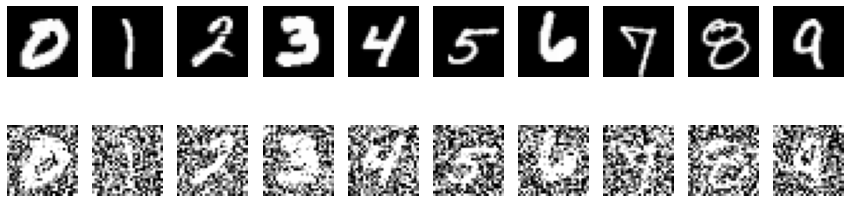

In [ ]:
# TODO
# 1. Plot the images on 2 rows, one is orignal one is noisy, 1 image for each class
fig, axs = plt.subplots(2,10, figsize=(15,4))
for i in range(2):
  for j in range(10):
    np.random.seed(42)
    target = np.random.choice(np.where(y_train == j)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    if i == 0:
      axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray')
    else:
      axs[i][j].imshow(np.squeeze(X_train_noisy[target]), cmap='gray')
plt.show()


## 3. Model & Training

**Build Encoder**

In [ ]:
# TODO
clear_session()
set_seed(42)
np.random.seed(42)

input = Input(shape=X_train_noisy.shape[1:])
x = Conv2D(32,3,padding='same',activation='relu')(input)
x = MaxPool2D()(x)
x = Conv2D(64,3,padding='same',activation='relu')(x)
x = MaxPool2D()(x)
x = Flatten()(x)
output = Dense(16, activation='relu')(x)

encoder = Model(input, output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                5019

**Build Decoder**

In [ ]:
# TODO
clear_session()
set_seed(42)
np.random.seed(42)

de_input = Input(shape=(16,))
x = Dense(3136, activation='relu')(de_input)
x = Reshape((7,7,64))(x)
x = Conv2DTranspose(32, 3, strides=2,padding='same', activation='relu')(x)
output = Conv2DTranspose(1, 3, strides=2,padding='same')(x)

decoder = Model(de_input, output, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 3136)              53312     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 72,065
Trainable params: 72,065
Non-trainable params: 0
_________________________________________________________________


**Build AutoEncoder**

In [ ]:
# TODO
autoencoder = Model(input, decoder(encoder(input)))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                69008     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         72065     
Total params: 141,073
Trainable params: 141,073
Non-trainable params: 0
_________________________________________________________________


**Training**

In [ ]:
# TODO
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.fit(X_train_noisy, X_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 4ms/step - loss: 0.0530 - val_loss: 0.0295
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0285 - val_loss: 0.0268
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0265 - val_loss: 0.0257
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0254 - val_loss: 0.0250
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0247 - val_loss: 0.0246


**Learning Curve**

In [ ]:
# TODO

## Inference

**Predict**

In [ ]:
# TODO
X_test_reconstruct = autoencoder.predict(X_test_noisy)

**Show reconstructed image**

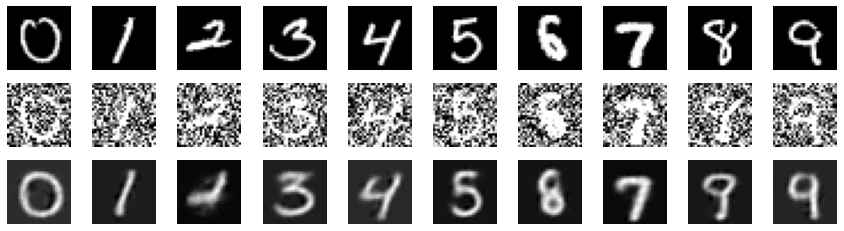

In [ ]:
# TODOs
# like above plot
# 3rd row is reconstructed
# TODO
# 1. Plot the images on 2 rows, one is orignal one is noisy, 1 image for each class
fig, axs = plt.subplots(3,10, figsize=(15,4))
for i in range(3):
  for j in range(10):
    np.random.seed(42)
    target = np.random.choice(np.where(y_test == j)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    if i == 0:
      axs[i][j].imshow(np.squeeze(X_test[target]), cmap='gray')
    elif i == 1:
      axs[i][j].imshow(np.squeeze(X_test_noisy[target]), cmap='gray')
    else:
      axs[i][j].imshow(np.squeeze(X_test_reconstruct[target]), cmap='gray')

plt.show()


# Excercise 2: Semantic Segmentation

**DATASET LINK** https://drive.google.com/file/d/18ZSHk0FQuROB7vsqT86KLcXUB2nX0Uqa/view?usp=sharing

**Goal**
- Try to predict "where is a hand" in each image of ASL dataset
- Use semantic segmantation method – Predict label for each pixel in a image 
 - 0: background
 - 1: hand

**UNet**
![](https://i.imgur.com/GiRvS5h.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prepare Dataset

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/s22/asl.zip' -d '/'

Archive:  /content/drive/MyDrive/Colab Notebooks/s22/asl.zip
replace /cotai/test_mask.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /cotai/test_mask.pkl    
  inflating: /cotai/val_mask.pkl     
  inflating: /cotai/test_img.pkl     
  inflating: /cotai/val_img.pkl      A
A

  inflating: /cotai/train_mask.pkl   
  inflating: /cotai/train_img.pkl    A
A
A
A
A



In [ ]:
import pickle

def load_data(path):
  file = open(path, 'rb')
  # get information from that file
  data = pickle.load(file)
  # close the file
  file.close()
  # return data
  return data

# call load_data here
train_img = load_data('/cotai/train_img.pkl')
val_img= load_data('/cotai/val_img.pkl')
test_img = load_data('/cotai/test_img.pkl')

train_mask = load_data('/cotai/train_mask.pkl')
val_mask= load_data('/cotai/val_mask.pkl')
test_mask = load_data('/cotai/test_mask.pkl')

**Checkout shape**

In [ ]:
train_mask.shape

(11425, 140, 100)

**Scale**

In [ ]:
# TODO
train_img = train_img/255.0
val_img = val_img/255.0
test_img = test_img/255.0

train_mask = train_mask/255.0
val_mask = val_mask/255.0
test_mask = test_mask/255.0

## Visualize Data

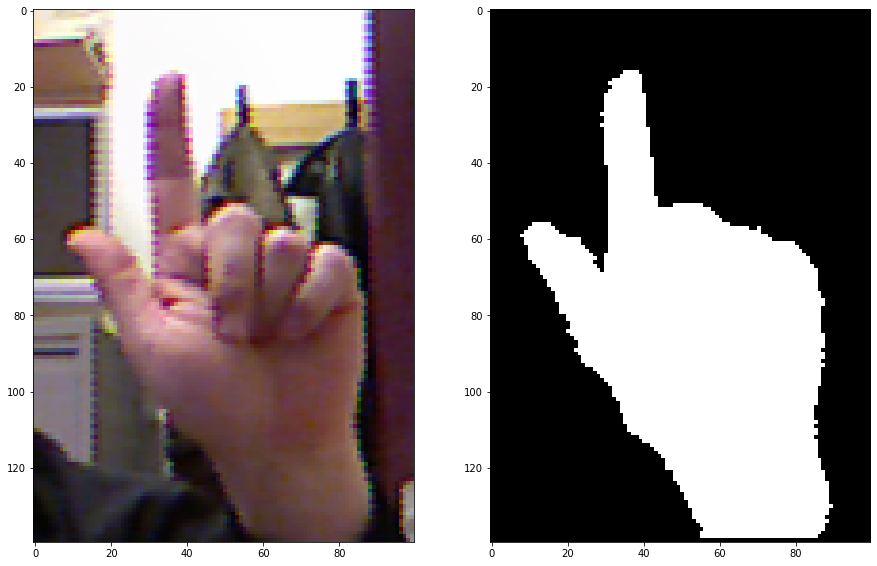

In [ ]:
# TODO
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=  (15,15))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(np.squeeze(train_img[2]), cmap='gray')
ax2.imshow(np.squeeze(train_mask[2]), cmap='gray')

## Model & Training

In [ ]:
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
clear_session()
set_seed(42)
np.random.seed(42)
def build_cnn_block(x, filters):
  for filter in filters:
    x = Conv2D(filter, 3, activation='relu', padding='same', kernel_initializer='he_normal')(x)
  return x

def Unet_model(input, classes = 1):
  block_1 = build_cnn_block(input, [16,16]) # 140-100-16
  block_p1 = MaxPool2D()(block_1) # 70-50-16

  block_2 = build_cnn_block(block_p1, [32,32]) # 70-50-32
  block_p2 = MaxPool2D()(block_2) # 35-25-32

  block_3 = build_cnn_block(block_p2, [64,64]) # 35-25-64
  block_p3 = MaxPool2D()(block_3) # 17-12-64

  block_4 = build_cnn_block(block_p3, [128,128]) # 17-12-128
  block_p4 = MaxPool2D()(block_4) # 8-6-128

  block_5 = build_cnn_block(block_p4,[256,256]) # 8-6-256
 # TODO
  up_4 = Conv2DTranspose(128,3,strides=2 ,kernel_initializer='he_normal',activation='relu')(block_5) #17-13-128
  up_4 = Cropping2D(((0,0),(0,1)))(up_4) #17-12-128
  # axis0 : so luong
  #axis1 : Height
  #axis2 : Width
  #axis3 : Channel
  up_4 = Concatenate(axis= 3)([up_4,block_4]) # 17-12-256

  block_6 = build_cnn_block(up_4,[128,128]) # 17-12-128

  up_3 = Conv2DTranspose(64,3,strides=2,activation='relu',padding = 'valid', kernel_initializer='he_normal')(block_6) # 35-25-64

  up_3 = Concatenate(axis= 3)([up_3,block_3]) # 35-25-128
  block_7 = build_cnn_block(up_3,[64,64]) # 35-25-64

  up_2 = Conv2DTranspose(32,3,strides=2,activation='relu',padding = 'same', kernel_initializer='he_normal')(block_7) #70-50-32
  up_2 = Concatenate(axis= 3)([up_2,block_2]) #70-50-64
  block_8 = build_cnn_block(up_2,[32,32]) #70-50-32

  up_1 = Conv2DTranspose(16,3,strides=2,activation='relu',padding = 'same', kernel_initializer='he_normal')(block_8) #140-50-16
  up_1 = Concatenate(axis= 3)([up_1,block_1]) #140-50-32
  block_9 = build_cnn_block(up_1,[16,16]) #140-50-16
  output = Conv2D(1,1,activation = 'sigmoid',padding = 'same')(block_9) # output
  model = Model(input,output)
  return model

model = Unet_model(Input((140,100,3)))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 140, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 140, 100, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 140, 100, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 70, 50, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

**Custom metrics (mIoU)**

In [ ]:
def mIoU(y_true, y_pred):
  y_pred = K.cast(K.greater(y_pred, .5), dtype='float32') # .5 is the threshold
  intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
  sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])
  iou = (intersection) / (sum_ - intersection )
  return K.mean(iou)

**Compile and Train**

In [ ]:
# TODO
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy',mIoU])
history = model.fit(train_img,train_mask,epochs = 5, verbose = 1,batch_size = 32, validation_data=(val_img,val_mask))

Epoch 1/5
358/358 [==============================] - 43s 96ms/step - loss: 0.2696 - accuracy: 0.8713 - mIoU: 0.7523 - val_loss: 0.1346 - val_accuracy: 0.9489 - val_mIoU: 0.8811
Epoch 2/5
358/358 [==============================] - 32s 91ms/step - loss: 0.0733 - accuracy: 0.9708 - mIoU: 0.9346 - val_loss: 0.0614 - val_accuracy: 0.9755 - val_mIoU: 0.9445
Epoch 3/5
358/358 [==============================] - 32s 91ms/step - loss: 0.0590 - accuracy: 0.9762 - mIoU: 0.9462 - val_loss: 0.0580 - val_accuracy: 0.9767 - val_mIoU: 0.9470
Epoch 4/5
358/358 [==============================] - 32s 91ms/step - loss: 0.0568 - accuracy: 0.9772 - mIoU: 0.9487 - val_loss: 0.0572 - val_accuracy: 0.9772 - val_mIoU: 0.9477
Epoch 5/5
358/358 [==============================] - 32s 91ms/step - loss: 0.0536 - accuracy: 0.9783 - mIoU: 0.9509 - val_loss: 0.0563 - val_accuracy: 0.9771 - val_mIoU: 0.9480


In [ ]:
test_img.shape,np.expand_dims(test_img,axis = 0).shape

((1551, 140, 100, 3), (1, 1551, 140, 100, 3))

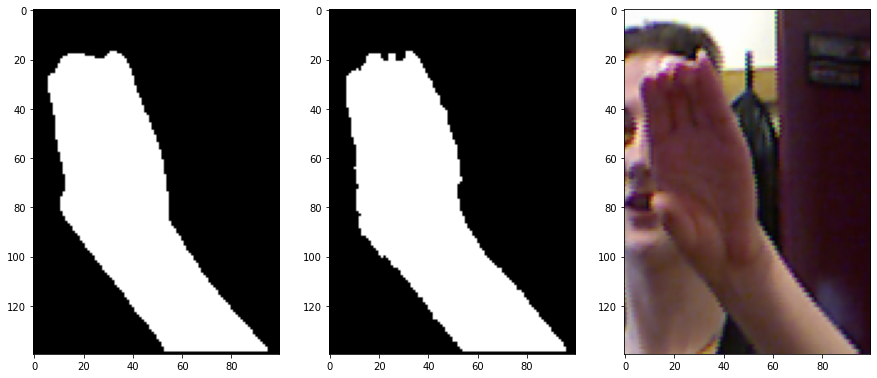

In [ ]:
test_preds = model.predict(np.expand_dims(test_img[42],axis = 0)) >= 0.5
fig = plt.figure(figsize=  (15,15))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.imshow(np.squeeze(test_preds), cmap='gray')
ax2.imshow(np.squeeze(test_mask[42]), cmap='gray')
ax3.imshow(np.squeeze(test_img[42]), cmap='gray')

**Learning Curve**

In [ ]:
# TODO

## Inference

In [ ]:
# TODO